In [1]:
import pandas as pd
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
options = pd.read_csv("data/tsla_options.csv")

### Main Expiration

In [3]:
exp = options[options.expiration_date == "2020-08-21"].reset_index(drop=True)
exp = exp[exp.date_current == "2020-07-13"]
expc = exp[exp.option_type == "C"]
expp = exp[exp.option_type == "P"]

/home/zquantz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zquantz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


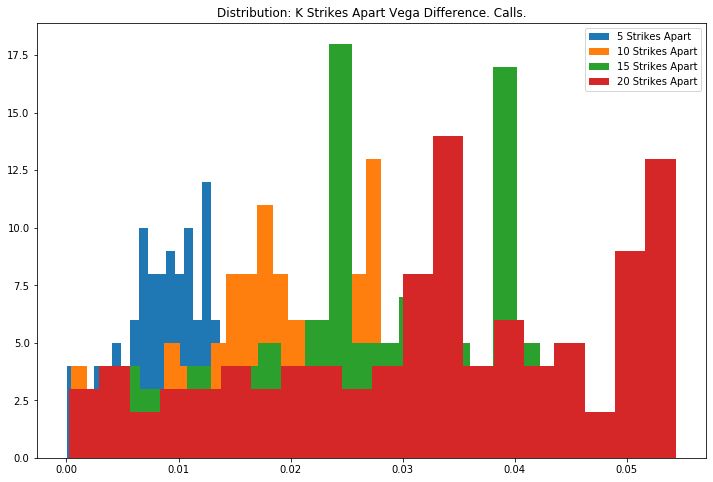

In [4]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Vega Difference. Calls.")
plt.hist(expc.vega.diff(periods=5).abs(), bins=bins, label="5 Strikes Apart")
plt.hist(expc.vega.diff(periods=10).abs(), bins=bins, label="10 Strikes Apart")
plt.hist(expc.vega.diff(periods=15).abs(), bins=bins, label="15 Strikes Apart")
plt.hist(expc.vega.diff(periods=20).abs(), bins=bins, label="20 Strikes Apart")
plt.legend()
plt.savefig("plots/k_strikes_apart_vega_calls.png")
plt.show()

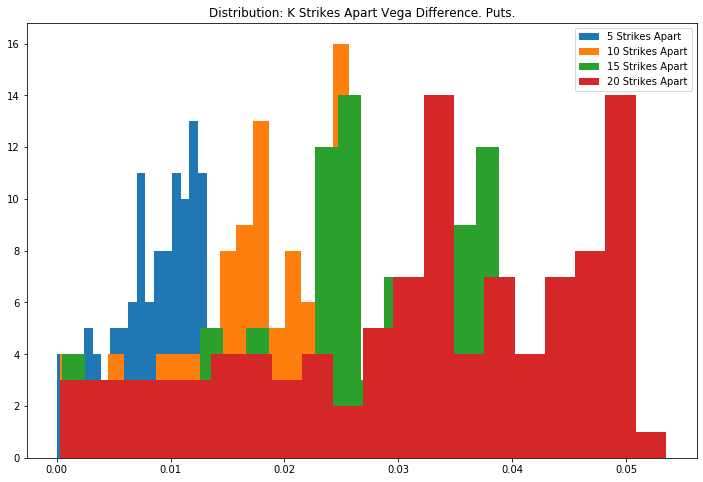

In [5]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Vega Difference. Puts.")
plt.hist(expp.vega.diff(periods=5).abs(), bins=bins, label="5 Strikes Apart")
plt.hist(expp.vega.diff(periods=10).abs(), bins=bins, label="10 Strikes Apart")
plt.hist(expp.vega.diff(periods=15).abs(), bins=bins, label="15 Strikes Apart")
plt.hist(expp.vega.diff(periods=20).abs(), bins=bins, label="20 Strikes Apart")
plt.legend()
plt.savefig("plots/k_strikes_apart_vega_puts.png")
plt.show()

### Second Expiration

In [6]:
exp2 = options[options.expiration_date == "2020-10-16"].reset_index(drop=True)
exp2 = exp2[exp2.date_current == "2020-07-13"]
exp2c = exp2[exp2.option_type == "C"]
exp2p = exp2[exp2.option_type == "P"]

In [7]:
vega_exp_diff = expc[['strike_price', 'vega']].merge(exp2c[['strike_price', 'vega']], on='strike_price', how='inner')

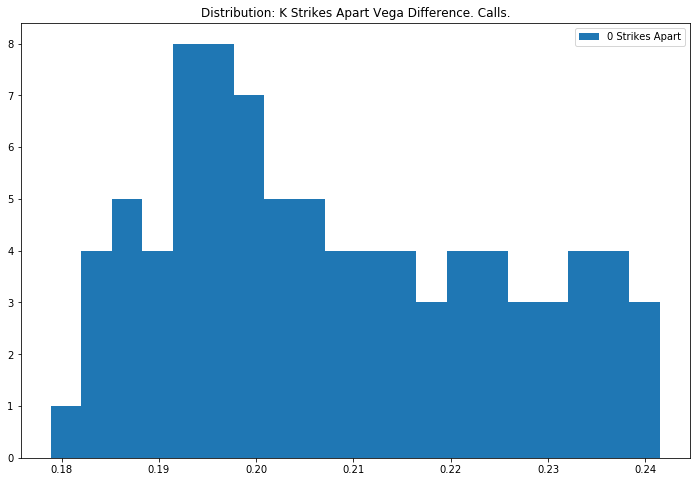

In [8]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Vega Difference. Calls.")
plt.hist((vega_exp_diff.vega_y.shift(periods=0) - vega_exp_diff.vega_x).abs(), bins=bins, label="0 Strikes Apart")
plt.legend()
plt.savefig("plots/expiration_diff_vega_calls.png")
plt.show()

In [9]:
vega_exp_diff = expp[['strike_price', 'vega']].merge(exp2p[['strike_price', 'vega']], on='strike_price', how='inner')

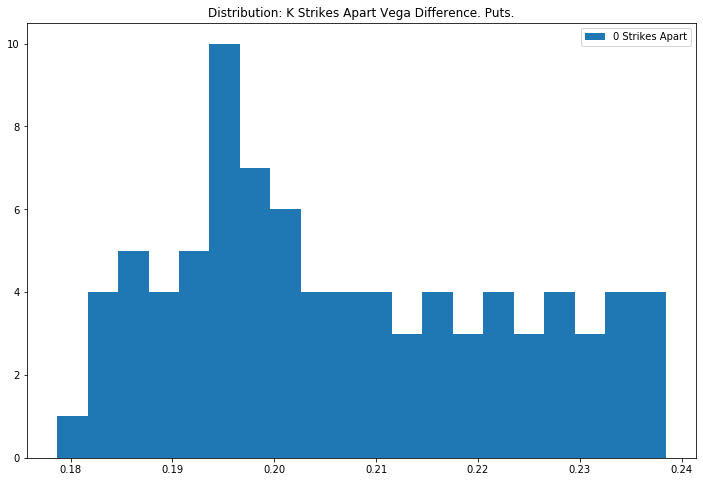

In [10]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Vega Difference. Puts.")
plt.hist((vega_exp_diff.vega_y.shift(periods=0) - vega_exp_diff.vega_x).abs(), bins=bins, label="0 Strikes Apart")
plt.legend()
plt.savefig("plots/expiration_diff_vega_puts.png")
plt.show()

In [11]:
delta_exp_diff = expc[['strike_price', 'delta']].merge(exp2c[['strike_price', 'delta']], on='strike_price', how='inner')

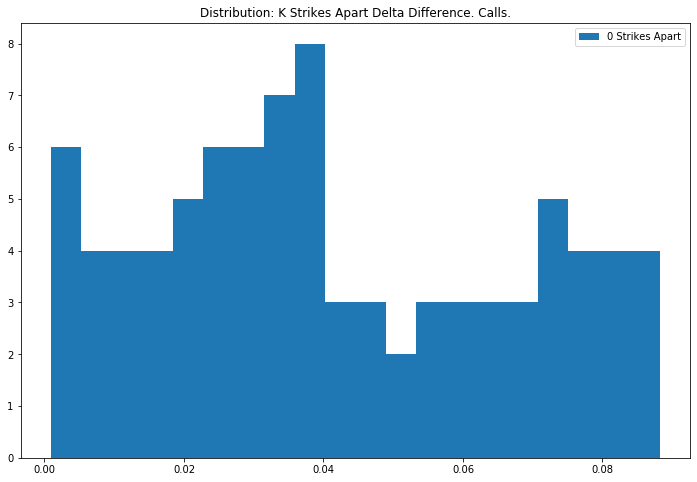

In [12]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Delta Difference. Calls.")
plt.hist((delta_exp_diff.delta_y.shift(periods=0) - delta_exp_diff.delta_x).abs(), bins=bins, label="0 Strikes Apart")
plt.legend()
plt.savefig("plots/expiration_diff_delta_calls.png")
plt.show()

In [13]:
delta_exp_diff = expp[['strike_price', 'delta']].merge(exp2p[['strike_price', 'delta']], on='strike_price', how='inner')

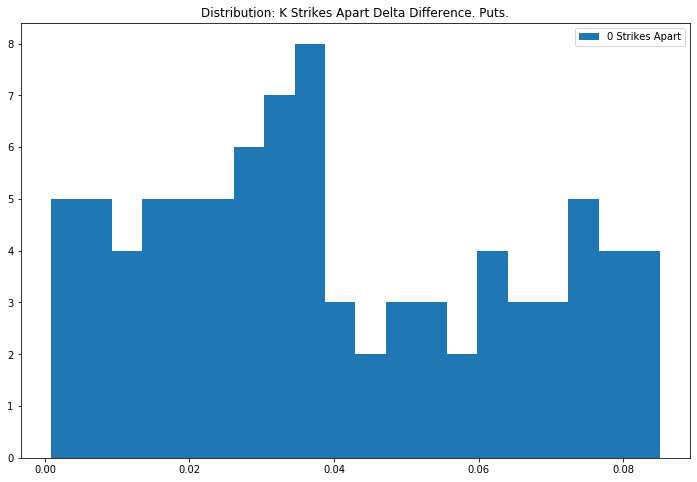

In [14]:
bins = 20
plt.figure(figsize=(12, 8))
plt.title("Distribution: K Strikes Apart Delta Difference. Puts.")
plt.hist((delta_exp_diff.delta_y.shift(periods=0) - delta_exp_diff.delta_x).abs(), bins=bins, label="0 Strikes Apart")
plt.legend()
plt.savefig("plots/expiration_diff_delta_puts.png")
plt.show()

### Linear Regression of Distance to ATM and Vega Spread

In [56]:
cols = ['strike_price', 'vega', 'stock_price']
atm_distance = expp[cols].merge(exp2p[cols[:2]], on='strike_price', how='inner')

In [70]:
atm_distance['atm_distance'] = (atm_distance.stock_price / atm_distance.strike_price - 1) * -1
atm_distance['vega_distance'] = atm_distance.vega_y - atm_distance.vega_x

In [71]:
data = atm_distance[['atm_distance', 'vega_distance']]
data.columns = ['Moneyness', 'Vega Difference']

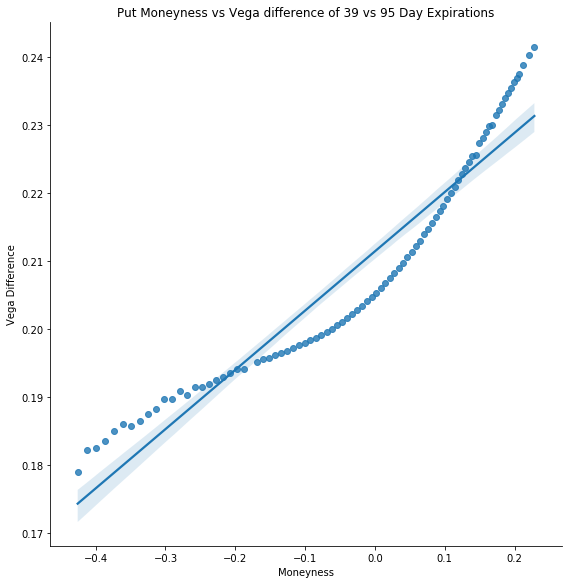

In [72]:
sns.lmplot('Moneyness', 'Vega Difference', data, height=8)
plt.title("Put Moneyness vs Vega difference of 39 vs 95 Day Expirations")
plt.savefig("plots/moneyness_vs_vega_diff_puts.png")

In [73]:
cols = ['strike_price', 'vega', 'stock_price']
atm_distance = expc[cols].merge(exp2c[cols[:2]], on='strike_price', how='inner')

In [74]:
atm_distance['atm_distance'] = (atm_distance.stock_price / atm_distance.strike_price - 1)
atm_distance['vega_distance'] = atm_distance.vega_y - atm_distance.vega_x

In [75]:
data = atm_distance[['atm_distance', 'vega_distance']]
data.columns = ['Moneyness', 'Vega Difference']

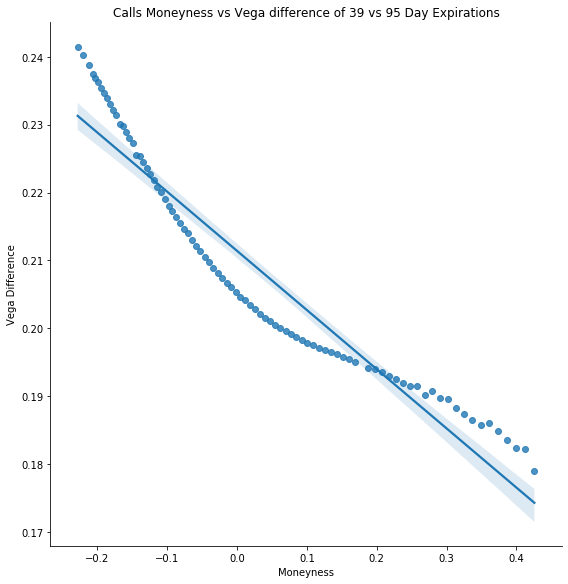

In [76]:
sns.lmplot('Moneyness', 'Vega Difference', data, height=8)
plt.title("Calls Moneyness vs Vega difference of 39 vs 95 Day Expirations")
plt.savefig("plots/moneyness_vs_vega_diff_calls.png")